In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import nltk
from nltk.corpus import stopwords


/var/folders/qp/_cz8x4hj1730r0wn6pht12dr0000gn/T/ipykernel_21782/637892070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data/TBG_unique_raw.csv')

/var/folders/qp/_cz8x4hj1730r0wn6pht12dr0000gn/T/ipykernel_21782/1104299666.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TBG_unique_raw.csv')


In [49]:
# df.head()

,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,word_count,copyright,content-id,volume,issue_number,edition,pub_name,pub_date,licensor_indexing_terms,indexing_terms
0,"Newspaper, Newspapers",SPORTS,NaN,Team up in air on Canada's pot issue,NaN,NaN,"calgary, alberta — some bruins rely on plant-b...",body while now legal in 13 nhl cities — seven ...,['ENGLISH'],912.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-1a045630-d24e-11e8-83d5-dee7c961b652,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'STX..."
1,"Newspaper, Newspapers",NEWS,National,Treasury worker is charged with leaks,NaN,NaN,washington — a senior treasury department empl...,body the charges reflect the latest move in th...,['ENGLISH'],273.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-68f23a02-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'legal': [{'className': 'Banking Law', 'class..."
2,"Newspaper, Newspapers",LIVING ARTS,NaN,"Funny Women luncheon raises record $950,000 fo...",NaN,NaN,edwidge danticat spoke at the luncheon to bene...,body at tuesday's funny women . . . serious bu...,['ENGLISH'],247.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-0799bdb4-d23a-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'STX..."
3,"Newspaper, Newspapers",NEWS,Foreign,Turkish officials say audio reveals torture,NaN,NaN,istanbul — his killers were waiting when jamal...,"body khashoggi was dead within minutes, and wi...",['ENGLISH'],474.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-d9f9ad0c-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'N92..."
4,"Newspaper, Newspapers",NEWS,Metro,N.E. Journal pulls stem cell researcher's paper,Concern espressed about 2 other articles,NaN,the new england journal of medicine on wednesd...,body anversa directed a lab at the brigham fro...,['ENGLISH'],635.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-178e505e-d262-11e8-8bbe-65aa870fef5a,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'ST0..."


In [58]:
# number_of_rows = len(df.index) + 1
# 162104
# number_of_rows 

# slice df into smaller dfs
# df1 = df.loc[:20000]
# df1.head()
# df1.to_csv('data/sample_1000rows.csv', index=False)

# df = pd.read_csv('data/002d3d12-0332-4853-b549-3056514abb25.csv')
# df.head()

,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,word_count,copyright,content-id,volume,issue_number,edition,pub_name,pub_date,licensor_indexing_terms,indexing_terms
0,"Newspaper, Newspapers",SPORTS,NaN,Team up in air on Canada's pot issue,NaN,NaN,"calgary, alberta — some bruins rely on plant-b...",body while now legal in 13 nhl cities — seven ...,['ENGLISH'],912.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-1a045630-d24e-11e8-83d5-dee7c961b652,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'STX..."
1,"Newspaper, Newspapers",NEWS,National,Treasury worker is charged with leaks,NaN,NaN,washington — a senior treasury department empl...,body the charges reflect the latest move in th...,['ENGLISH'],273.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-68f23a02-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'legal': [{'className': 'Banking Law', 'class..."
2,"Newspaper, Newspapers",LIVING ARTS,NaN,"Funny Women luncheon raises record $950,000 fo...",NaN,NaN,edwidge danticat spoke at the luncheon to bene...,body at tuesday's funny women . . . serious bu...,['ENGLISH'],247.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-0799bdb4-d23a-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'STX..."
3,"Newspaper, Newspapers",NEWS,Foreign,Turkish officials say audio reveals torture,NaN,NaN,istanbul — his killers were waiting when jamal...,"body khashoggi was dead within minutes, and wi...",['ENGLISH'],474.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-d9f9ad0c-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'N92..."
4,"Newspaper, Newspapers",NEWS,Metro,N.E. Journal pulls stem cell researcher's paper,Concern espressed about 2 other articles,NaN,the new england journal of medicine on wednesd...,body anversa directed a lab at the brigham fro...,['ENGLISH'],635.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-178e505e-d262-11e8-8bbe-65aa870fef5a,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'ST0..."


In [3]:
df1 = df

In [4]:
# create news category column, clean noise
df1["category"] = ""
mylen = len(df1['position_section'])
# df1['position_section'][725].split(';')[0]

df1["position_section"] = df1["position_section"].fillna("").astype(str)
df1['category'] = df1['position_section'].str.split(';').str[0]

df1['category']

0               SPORTS
1                 NEWS
2          LIVING ARTS
3                 NEWS
4                 NEWS
              ...     
1621008       BUSINESS
1621009           NEWS
1621010           NEWS
1621011         SPORTS
1621012       BUSINESS
Name: category, Length: 1621013, dtype: object

Text(0.5, 1.0, 'News Category Distribution')

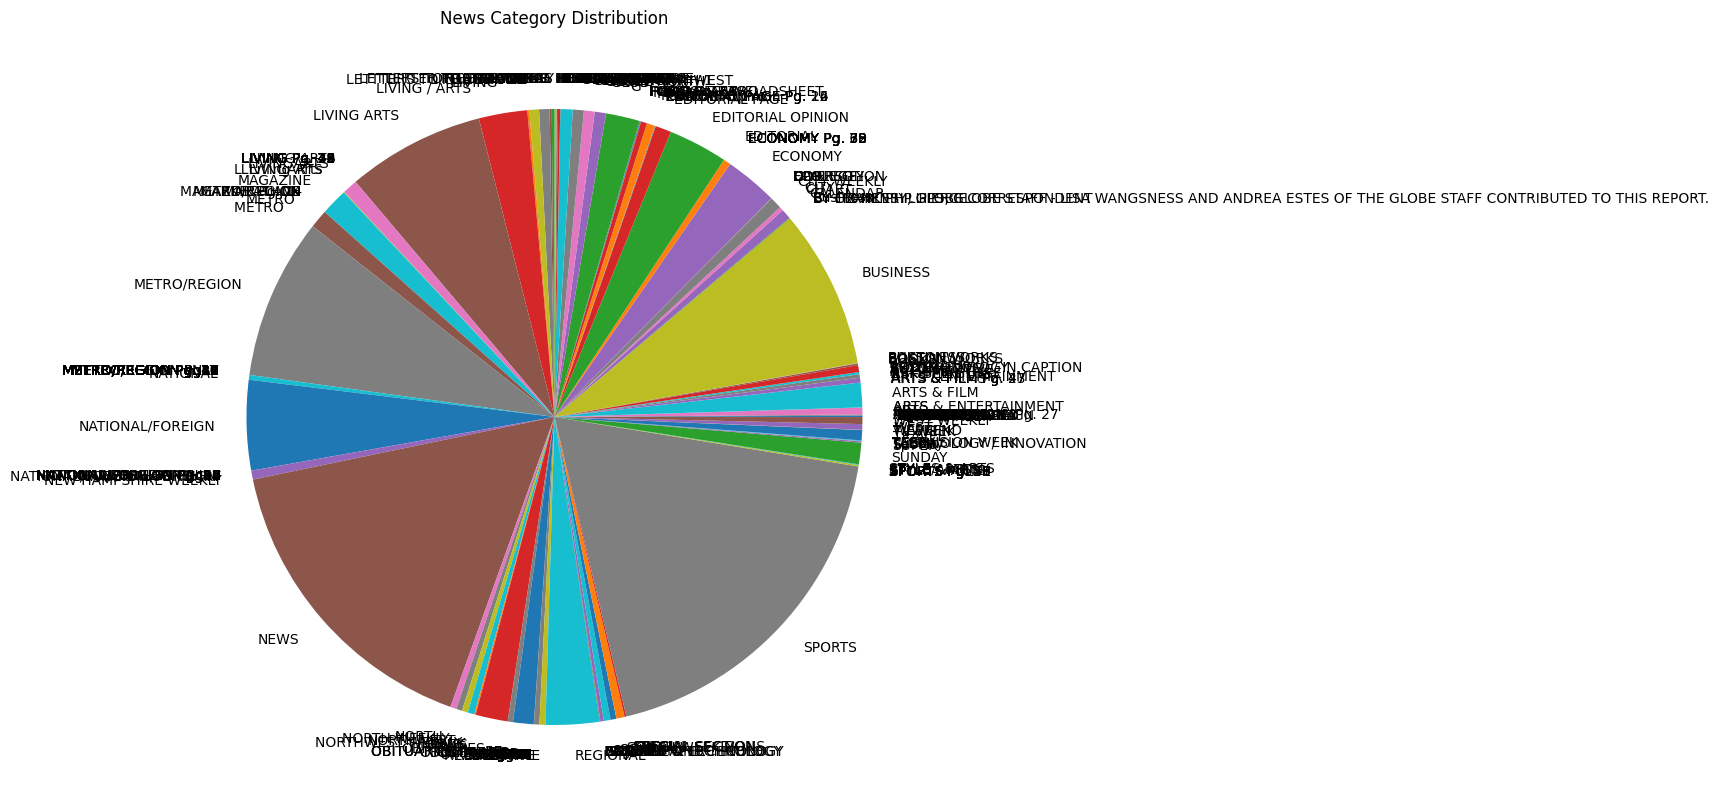

In [100]:
perCategory = df1.groupby(['category'], as_index=False).count()
perCategory
plt.figure(figsize=(10,10))
plt.pie(perCategory['position_section'], labels=perCategory['category'])
plt.title("News Category Distribution")

Text(0.5, 1.0, 'Top 10 News Categories')

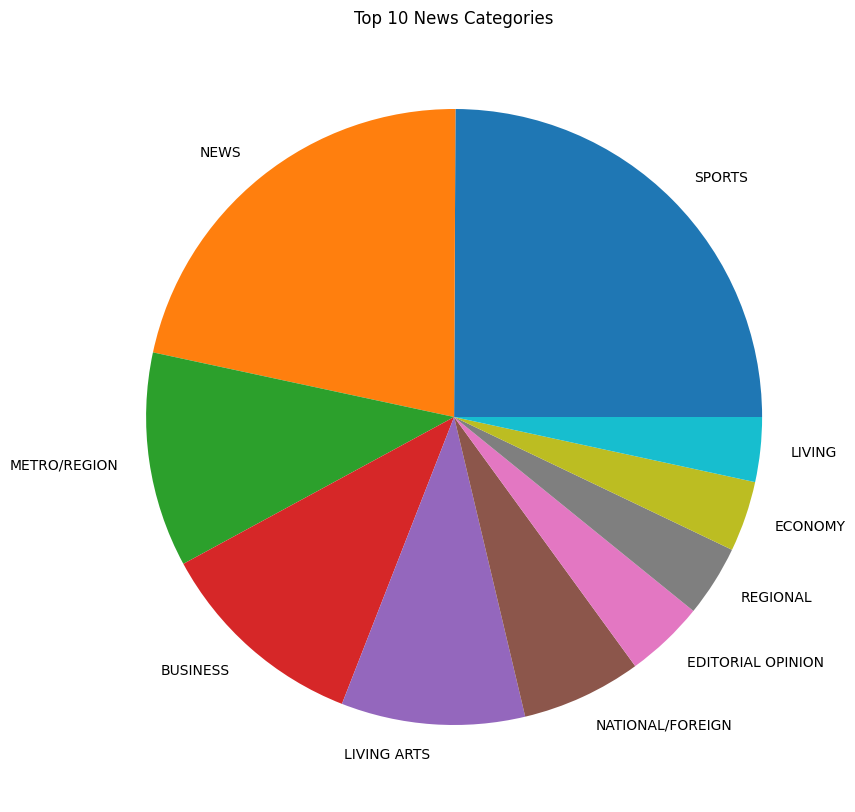

In [99]:
# show top 10 topics 
topCategory = perCategory.nlargest(10, 'position_section')
topCategory
plt.figure(figsize=(10,10))
plt.pie(topCategory['position_section'], labels=topCategory['category'])
plt.title("Top 10 News Categories")

Text(0.5, 1.0, 'News Subcategory Distribution')

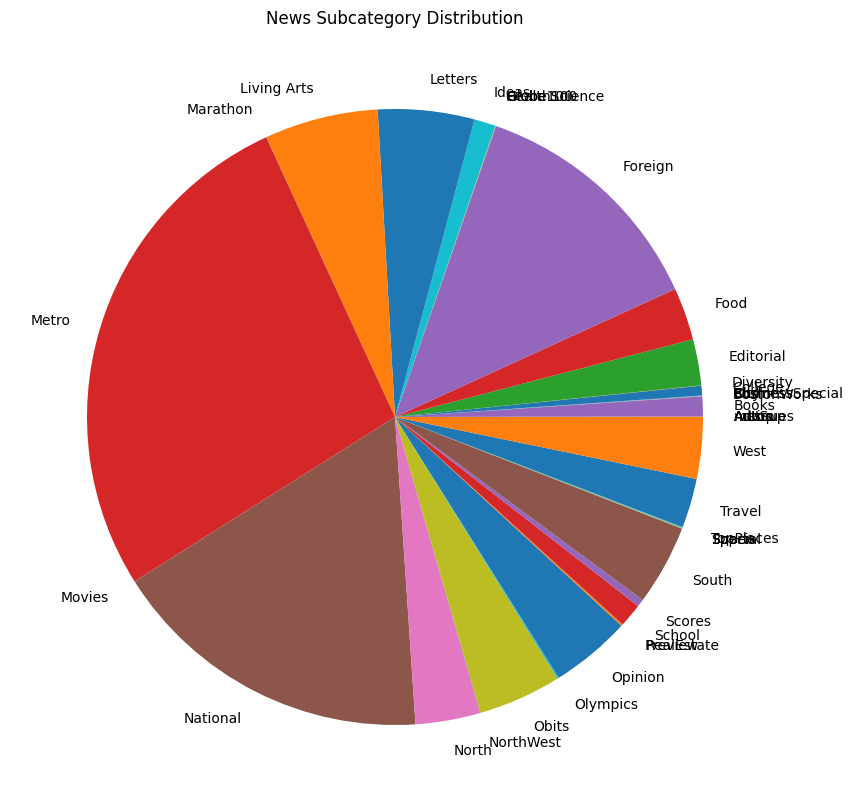

In [101]:
perSubCategory = df1.groupby(['position_subsection'], as_index=False).count()
perSubCategory
plt.figure(figsize=(10,10))
plt.pie(perSubCategory['pub_type'], labels=perSubCategory['position_subsection'])
plt.title("News Subcategory Distribution")

Text(0.5, 1.0, 'Top 10 News Subcategories')

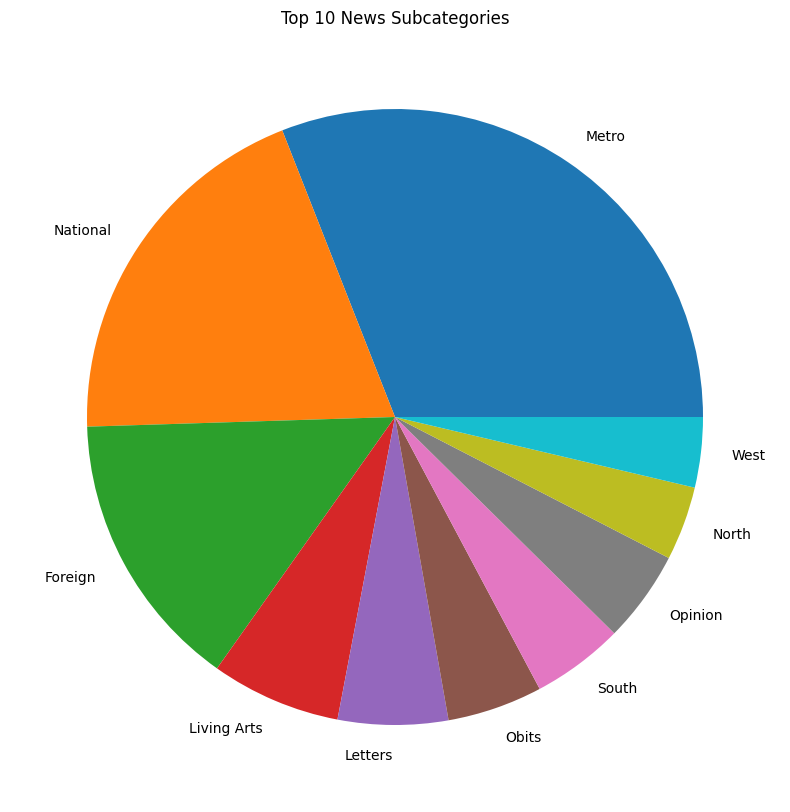

In [104]:
# top 10 sub-category
topSubCategory = perSubCategory.nlargest(10, 'position_section')
topSubCategory
plt.figure(figsize=(10,10))
plt.pie(topSubCategory['pub_type'], labels=topSubCategory['position_subsection'])
plt.title("Top 10 News Subcategories")

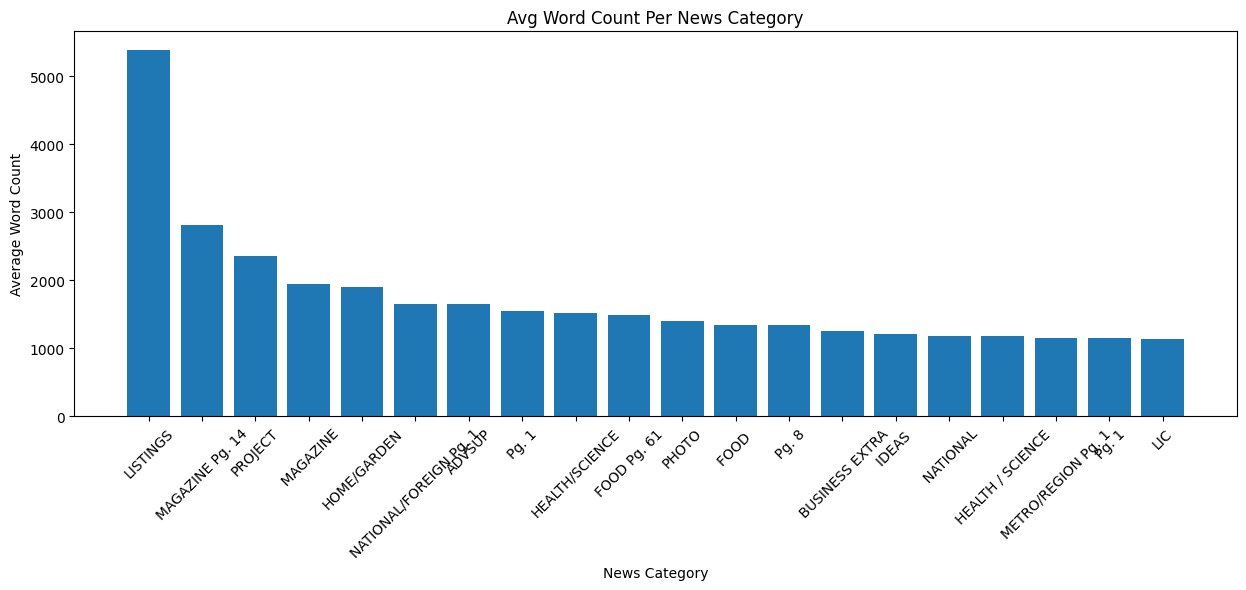

In [13]:
wordcountPerCategory = df1.groupby(['category'], as_index=False)['word_count'].mean()
top_wordcountPerCategory = wordcountPerCategory.nlargest(20, 'word_count')
wordcountPerCategory
plt.figure(figsize=(15,5))
plt.bar(top_wordcountPerCategory.category.tolist(), top_wordcountPerCategory.word_count.tolist())
plt.ylabel('Average Word Count')
plt.xlabel('News Category')
plt.title('Avg Word Count Per News Category')
plt.tick_params(axis='x', labelrotation=45)

Text(0.5, 1.0, 'Article Year Distribution')

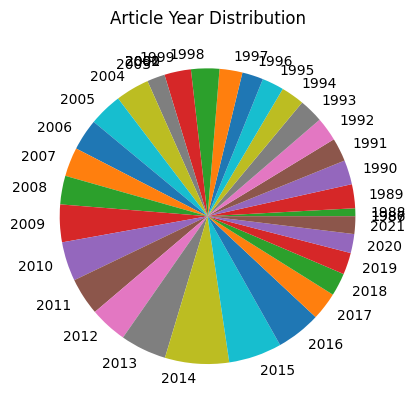

In [17]:
# year
df1['year'] = ""
df1['year'] = df1['pub_date'].str[38:42]

# for i in range(mylen):
#     year = df1['pub_date'][i][38:42]
#     df1['year'][i] = year

# df1['year']

perYear = df1.groupby(['year'], as_index=False).count()
perYear
plt.pie(perYear['position_section'], labels=perYear['year'])
plt.title("Article Year Distribution")

[nltk_data] Downloading package stopwords to /Users/lixi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


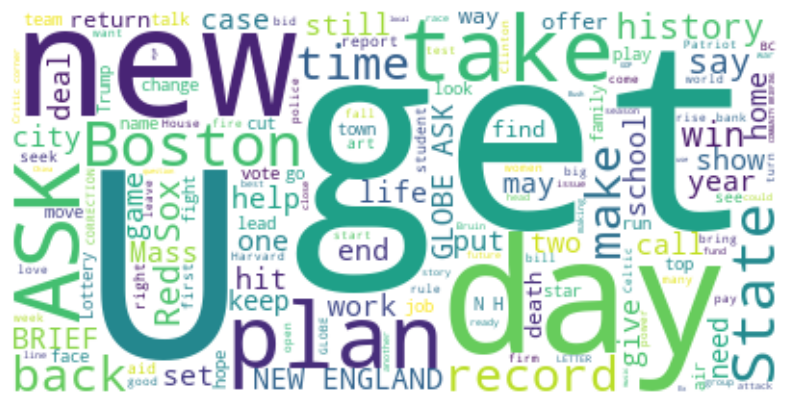

In [15]:
# word cloud - titles
nltk.download('stopwords')
# form up a huge string containing all titles
df1["hl1"] = df1["hl1"].fillna("").astype(str)
text = " ".join(title for title in df1['hl1'])

stop_words = set(stopwords.words('english')) 
stop_words

wcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [18]:
# word cloud - article body
# form up a huge string containing all titles
df1["body"] = df1["body"].fillna("").astype(str)
text = " ".join(body for body in df1['body'])
wcloud_body = wordcloud.WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wcloud_body, interpolation='bilinear')
plt.axis("off")
plt.show()
